# What are the Best Medical Markers to Predict Heart Disease? 

In [1]:
# Load pandas
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Import Data

Initially imported Pandas: an open source Python package used for data science/data analysis and machine learning tasks.

Data was taken from https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?select=heart.csv and saved into my local harddrive. 
 


In [2]:
import pandas as pd
Heartdata = pd.read_csv('heart.csv')

y=Heartdata.pop("target")
X=Heartdata


# Visualise the dataset.

This dataset was taken in 1988 from 4 different geographical locations and amalgulmated into one dataset of 1025 patients. 

The target variable (y) is a categorical indicator confirming the presence of heart disease. 0 = no disease and 1 = disease. 

There are 14 covariates as detailed below:

1. age (in years)
2. sex (1=male, 0= female)
3. cp: chest pain type (4 values)
4. trestbps: resting blood pressure (in mm Hg on admission to hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: fasting blood sugar > 120 mg/dl where 1=true, 0=false
7. restecg: resting electrocardiographic results (0 = Hypertrophy
1 = Having ST-T wave abnormality, 2 = Showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina 1 = yes, 0 = no
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: Thalium Stress test Result 0 = normal 1 = fixed defect; 2 = reversable defect

All names and identification of patients have been removed from the daatset. 


In [3]:
Heartdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


The target value "The presence of heart disease" was isolated. A value of 0 indicates no disease present in the patient and a value of 1 indicates disease. 

In [4]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [5]:
y.describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

# Exploring the Data

In [6]:
Heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


Plotting variation graphs for each variable. 

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

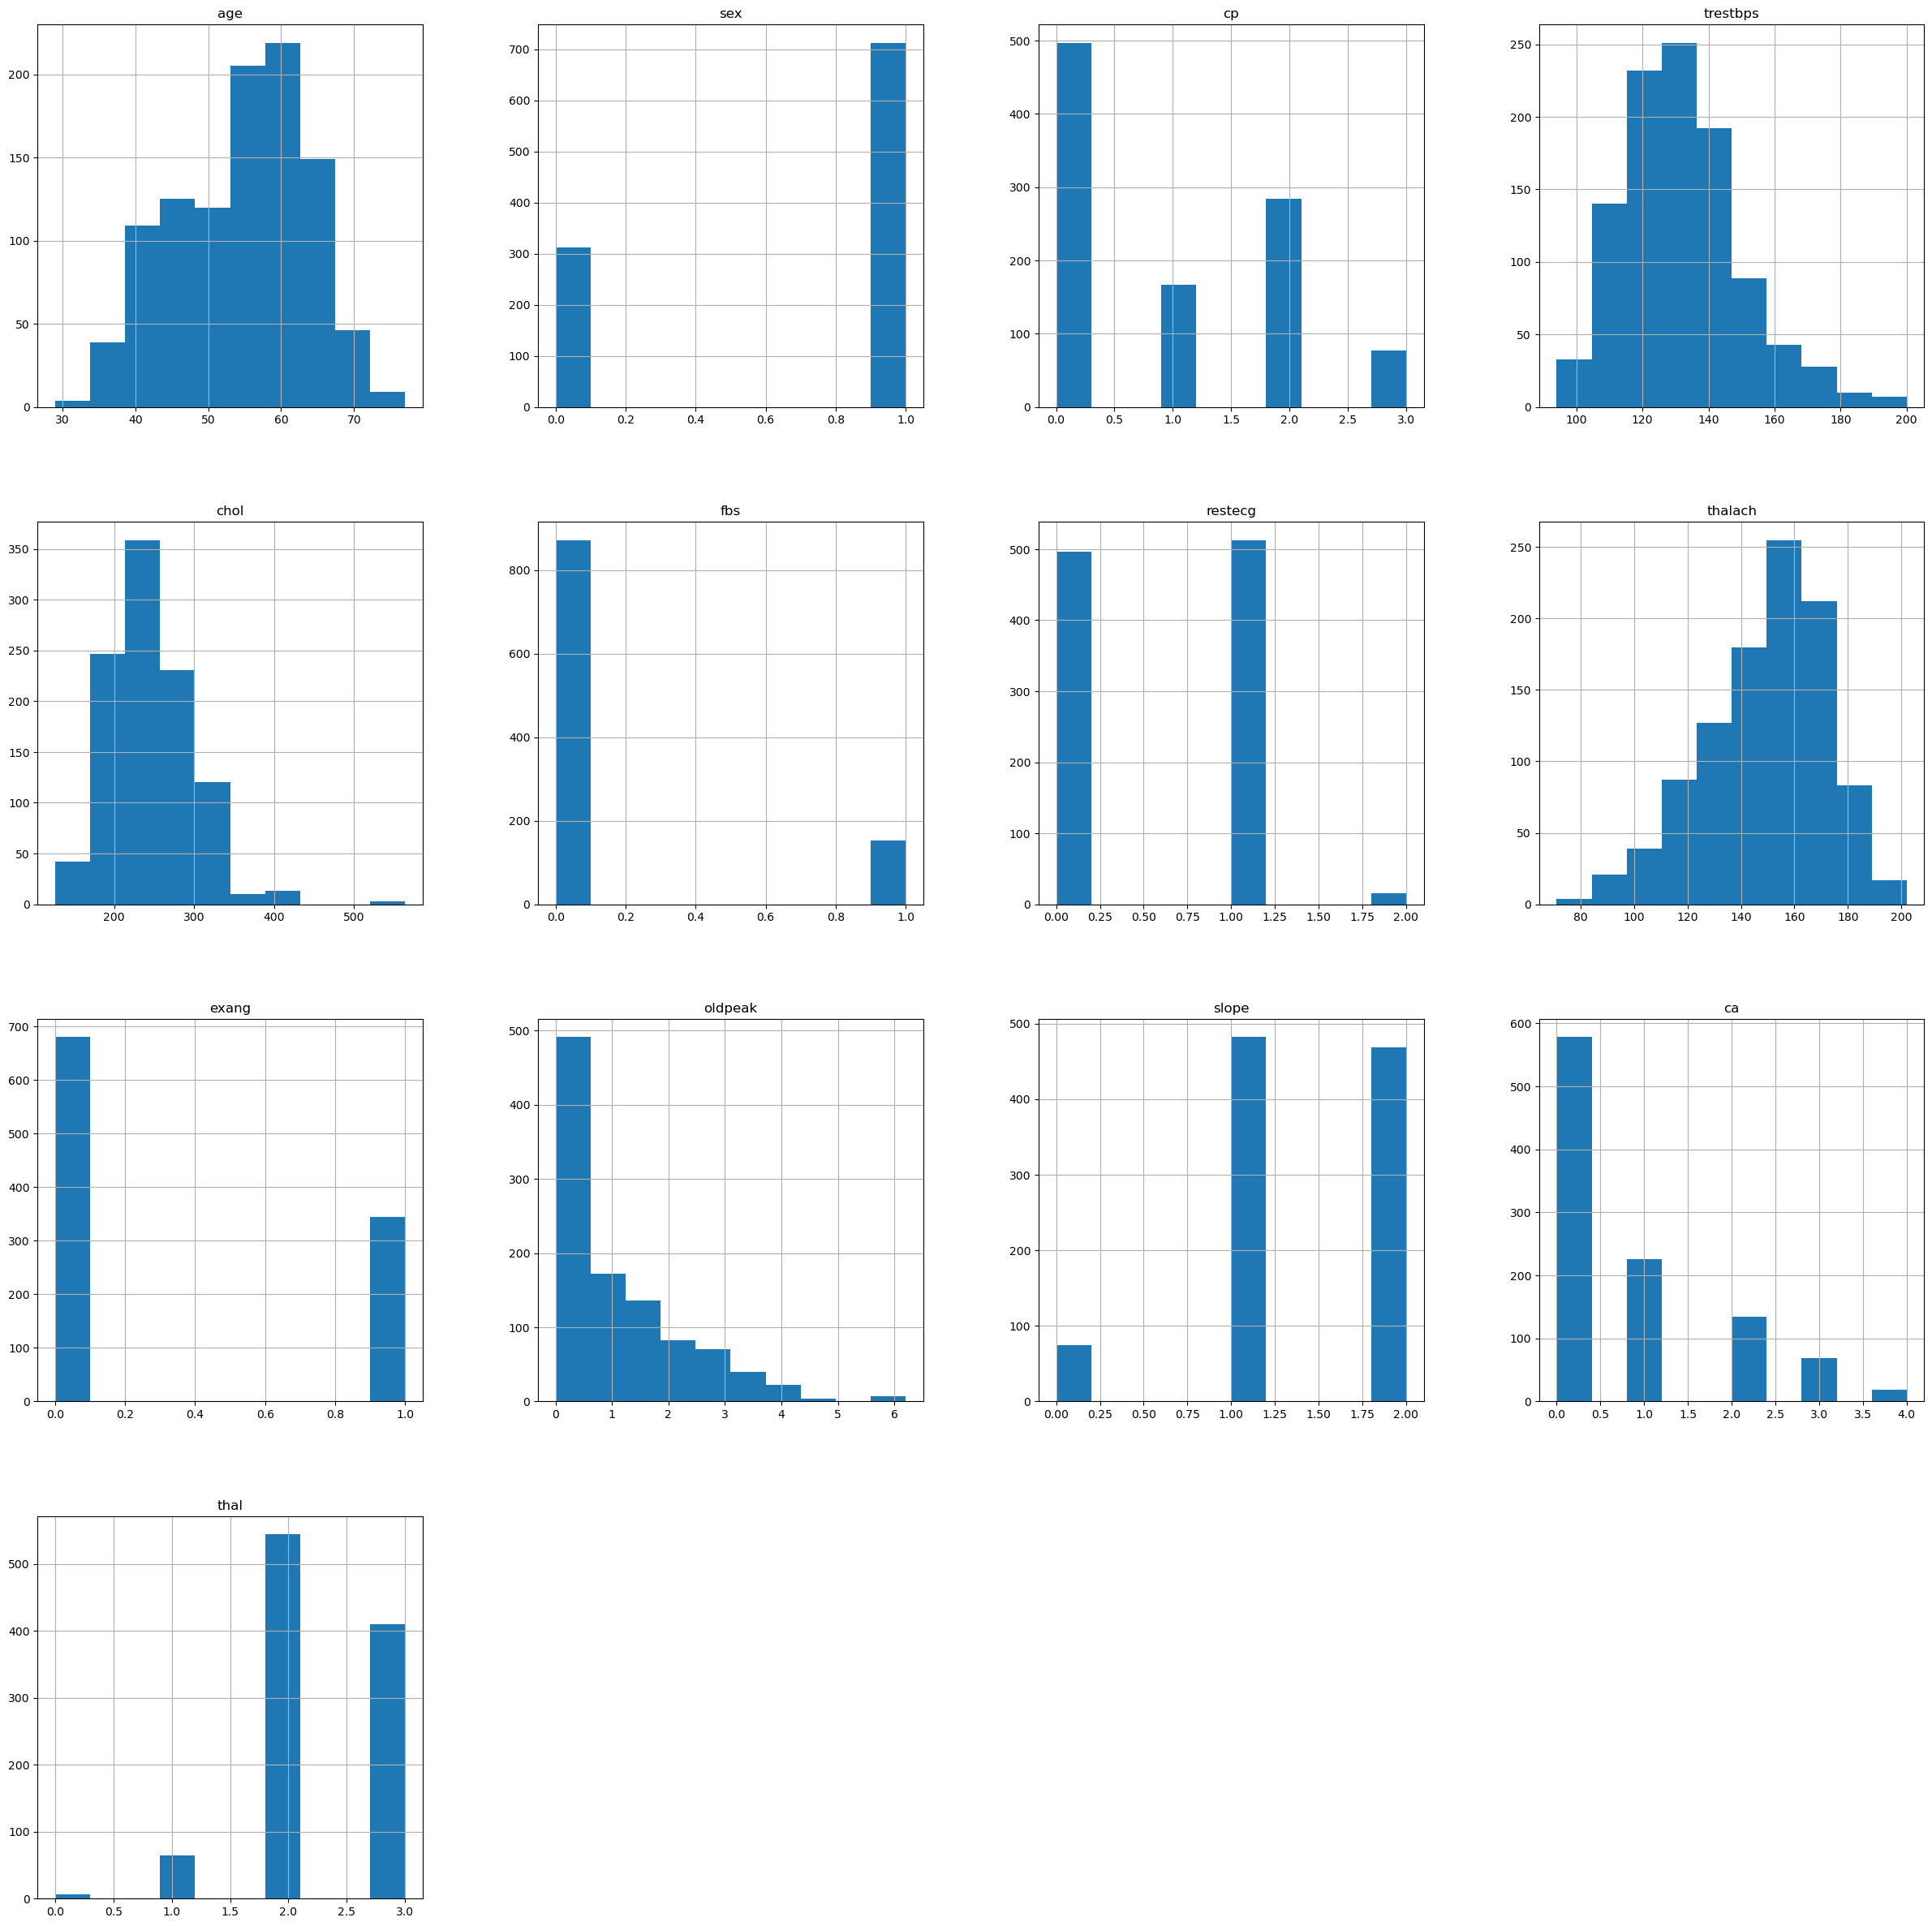

In [7]:
Heartdata.hist(figsize = (30,30))

**A count of the patients in the sample set who are "0" = without disease and "1" = with disease**

In [8]:
items = y
counts = pd.Series(items).value_counts()
print(counts)

1    526
0    499
Name: target, dtype: int64


**The disease prevalence in sample set shown as percentages.** 

In [9]:
def is_what_percent_of(num_a, num_b):
    return (num_a / num_b) * 100

disease = (round(is_what_percent_of(526,1025),0)) 
no_disease = (round(is_what_percent_of(499,1025),0)) 
print (f"% of patients with disease:{disease}")
print (f"% of patients with no disease: {no_disease}")

% of patients with disease:51.0
% of patients with no disease: 49.0


51% of patients had heart disease and 49% did not

**Confirmation on the sex of patients.**

In [10]:
Heartdata.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

713 patients are male and 312 are female

# Analysising Data

# *1. Multiple Cross Correlation*


A simple correlation table displaying the correlation between covariates. 

In [11]:
X.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


In [12]:
corr = X.corr()

The following variables are continuous: Age, Trestbps (resting blood pressure), cholesterol, thalach (maximum heart rate achieved) and oldpeak (ST depression induced by exercise relative to rest). 

There are no clearly strong corrleations but it is worth noting:

**Weak positive correlations between:**

Age and Resting Blood Pressure + 0.27

Cholesterol and Age + 0.22


**Weak negative correlation between:**

Maximum heart rate acheived and ST depression induced by exercise relative to rest -0.35

Age and Maximum Heart rate acheived -0.39




**Plotting the correlation**

**a) with a heatmap**

Correlations between variables are difficult to visualise! It would be easier to visualise in a Heatmap. This is acheived by creating the variable `corr` and importing `Seaborn`

<AxesSubplot:>

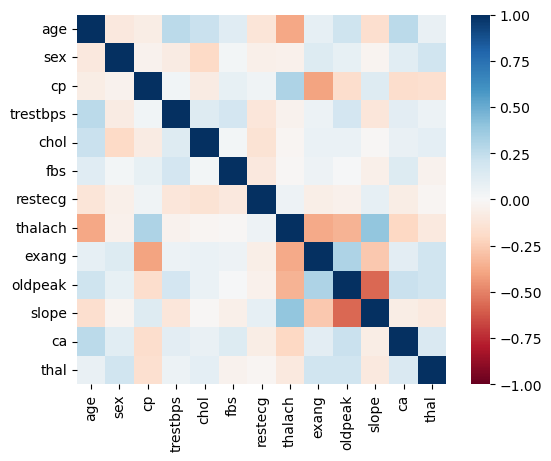

In [13]:
%matplotlib inline

import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

**Fig 2.** The heatmap indicates the already known weak correlations between the continuous variables as detailed above.  

**b) with a scatter matrix**

Our understanding of how the variables interact with each other can be further understood using a `scatter_matrix` from `Panda`. The target (disease or no disease ) can be shown within the `scatter_matrix` using the code `c=y`

In [14]:
from pandas.plotting import scatter_matrix


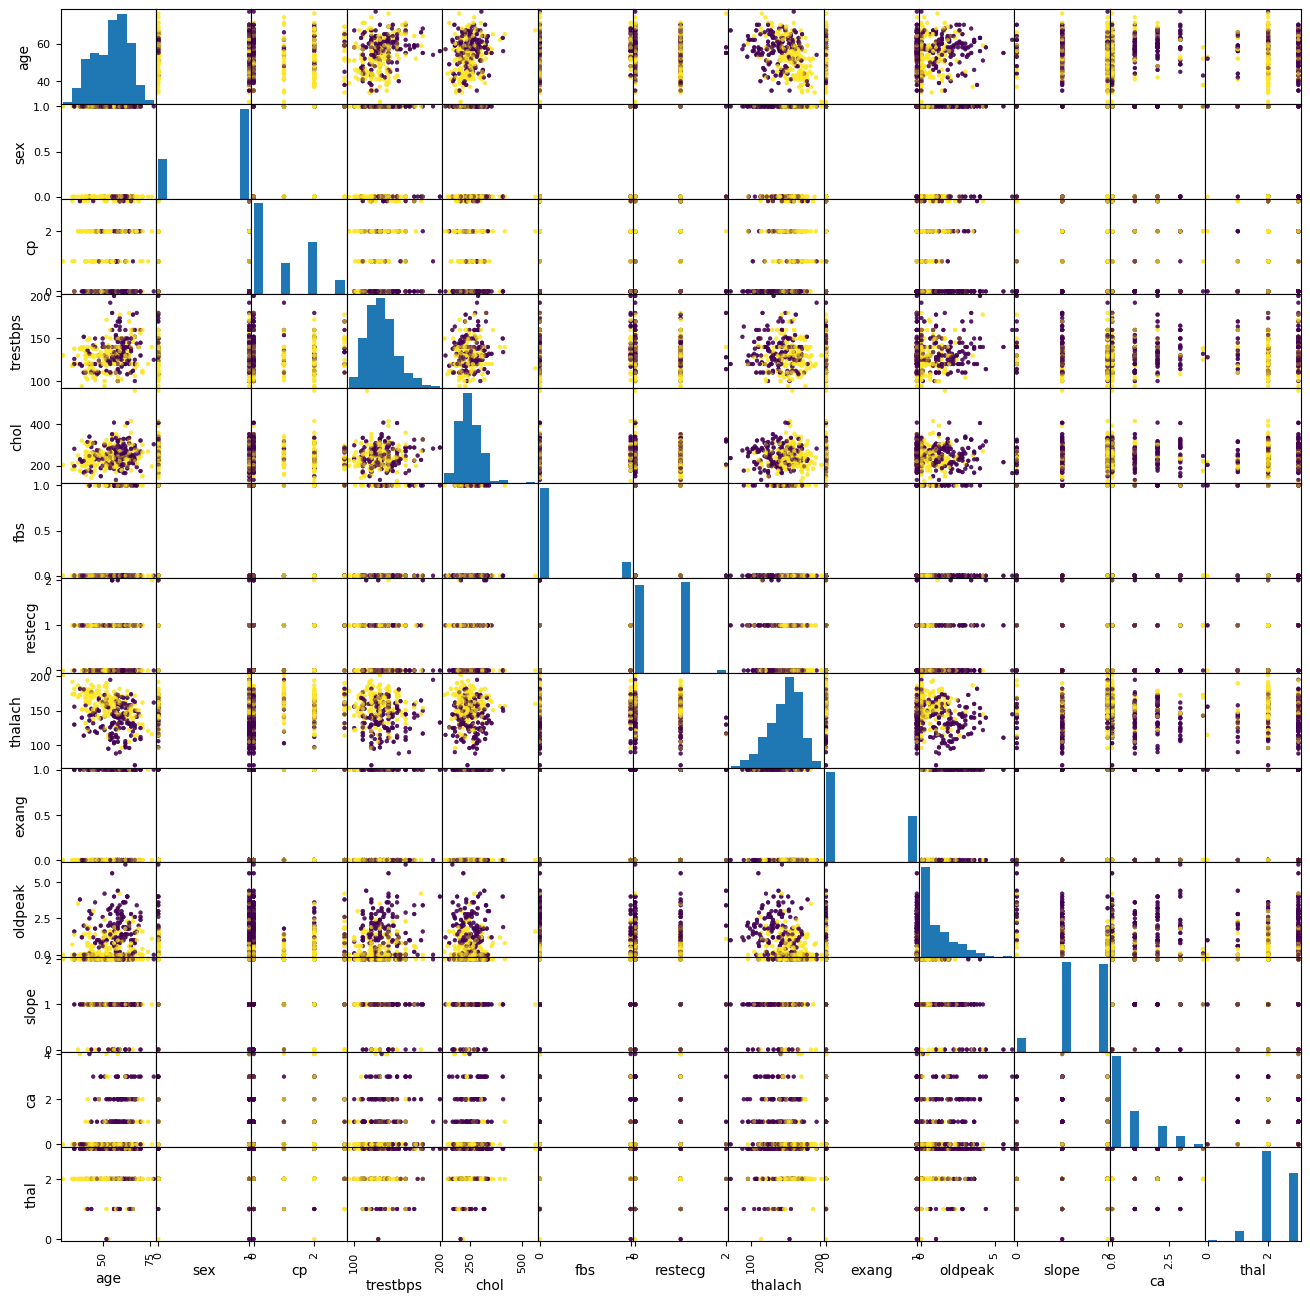

In [15]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(Heartdata, figsize=(16, 16),c=y)

**Fig 2.** 
It is not possible to accuaretly analysis correlation between variables that are categorical. 

However we can see from above some relevant correlation data where those patients diagnosed as suffering with heart disease (shown in purple) are clearly distinct from patients found not to be suffering with heart disease (shown in yellow). This is particularly evident in all the continous variables (detailed below): 

- trestbps: resting blood pressure (in mm Hg on admission to hospital)
- chol: serum cholestoral in mg/dl
- thalach: maximum heart rate achieved
- oldpeak: ST depression induced by exercise relative to rest
- age : in years


To keep things easier to visualise each known correlation (as demonstrated in the heatmap and scattermatrix can be firstly be looked at individually to view the distribution. These are essentially plots that show you the data show the scatter matrix reults at a larger scale.  

**1. Age & Cholesterol**

In [16]:
X_subset = X[["age", "chol"]]

First, let's have a look at the data and see how it's distributed:

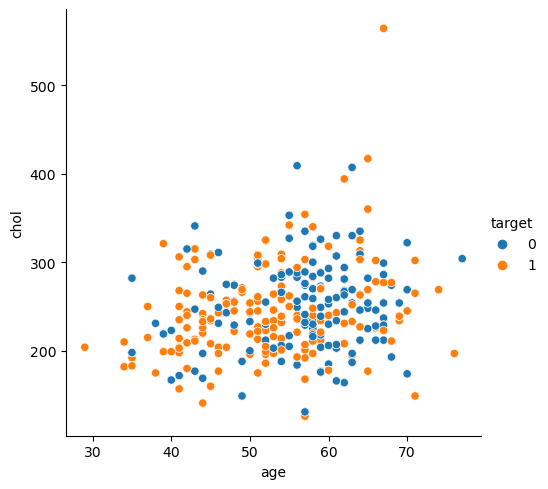

In [17]:
import seaborn as sns
import pandas as pd

sns.relplot(data=X, x="age", y="chol", hue=y)

The classes look vaguely distinct from each other so a k-nearest neighbours might work. 

**2. ST depression induced by exercise relative to rest (oldpeak) and Maximum Heart rate acheived (thalach)**


In [18]:
X_subset = X[["oldpeak", "thalach"]]

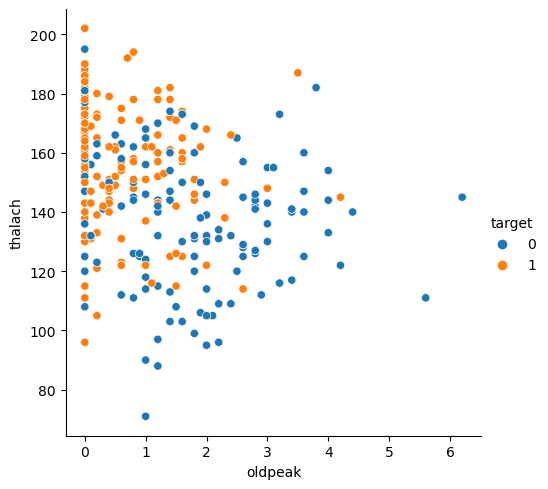

In [19]:
sns.relplot(data=X, x="oldpeak", y="thalach", hue=y)

Again the patients known to have disease and those without disease do look to be clustering (vaguely distinct from each other) so a k-nearest neighbours might work. It is clear though that standardisation on the data is needed as evident by the visual vertical line. 

**3. Age and Resting Blood Pressure**

In [20]:
X_subset = X[["age", "trestbps"]]

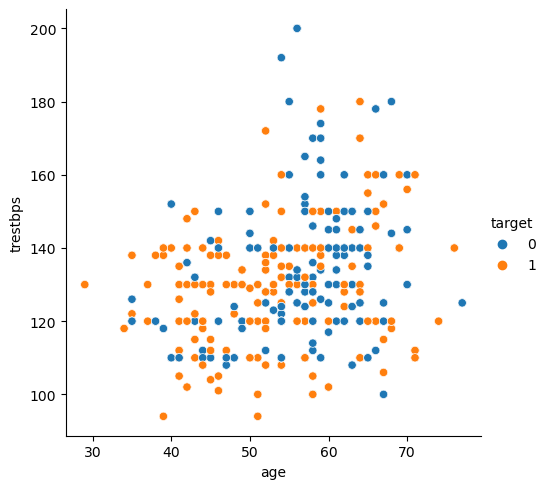

In [21]:
sns.relplot(data=X, x="age", y="trestbps", hue=y)

It is not very clear that there is any clustering for the variables age and resting blood pressure.  

**4. Age and Maximum Heart Rate**

In [22]:
X_subset = X[["age", "thalach"]]

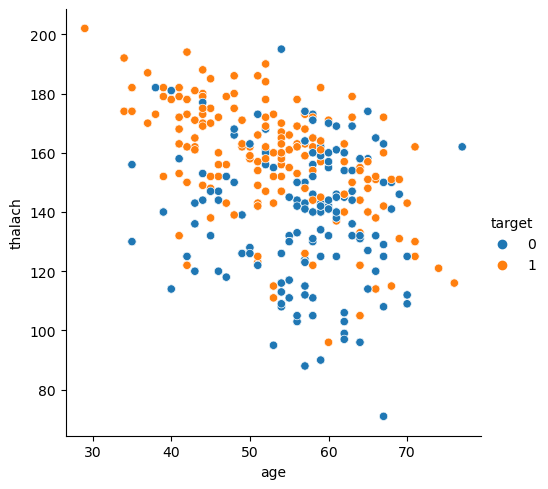

In [23]:
sns.relplot(data=X, x="age", y="thalach", hue=y)

# Nearest Neighbours Analysis

From the multiple cross correlation we have identified a number of continuous variables that appear to be weakly associated with the target (y) of whether a patient has heart disease or not. It would therefore be sensible to consider using the supervised technique K-nearest neighbours algorithm. This method uses training data to create a prediction model that allows you to define how a data point should be labelled. 

Start by importing relevant features from sklearn and choose two of the variables of interest that appear to be associated. We could see that the variables `oldpeak` and `thalach` were correlated (-0.35) and are clustering when plotted, indicating they are possibly good predictors of heart disease.  

In [24]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split

In [25]:
Heartdata = pd.read_csv('heart.csv')

y=Heartdata.pop("target")
X=Heartdata


Grab the two features we are interested in: 

In [26]:
X_subset = X[["oldpeak", "thalach"]]

We know that theer is some evident clustering from the plot showing distribution **Fig. 1**

With evident clustering k nearest neighbours should work. 

First split the data into test and train (the _s suffix represents our 2-feature subset):

In [27]:
from sklearn.model_selection import train_test_split

train_X_s, test_X_s, train_y_s, test_y_s = train_test_split(X_subset, y, random_state=42)

Fit and score the model with 2 nearest neighbours. 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

direct_knn = KNeighborsClassifier(algorithm='auto', leaf_size=45, n_neighbors=2, p=1)
direct_knn.fit(train_X_s, train_y_s)
direct_knn.score(test_X_s, test_y_s)

0.867704280155642

This means that the model is getting 14% of the data wrong. We can use the visualistaion function plot_knn to see the decsision boundary. 

In [29]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    if X.shape[1] != 2:
        raise ValueError(f"X must have exactly two features to plot, you passed X.shape={X.shape}")
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)
    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

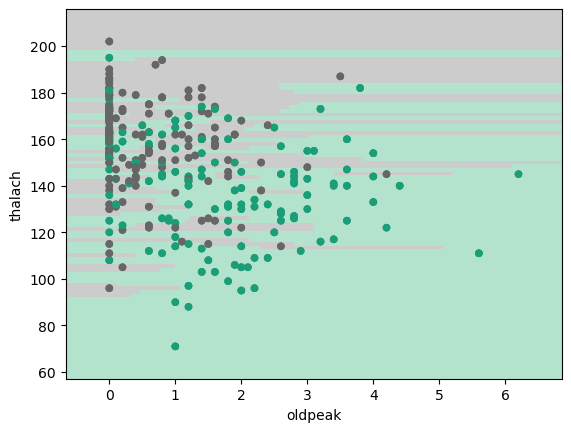

In [30]:
plot_knn(direct_knn, X_subset, y)

Something is not quite right. The range of values of the oldpeak and thalach axes are quite different and the plot below indicates how knn algorithm interrprets it. 

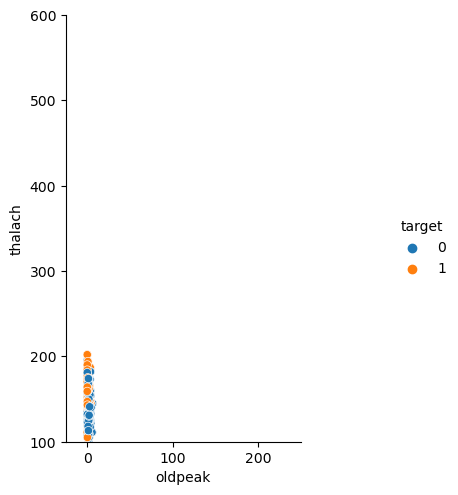

In [31]:
sns.relplot(data=X, x="oldpeak", y="thalach", hue=y).set(aspect="equal", xlim=(-25, 250), ylim=(100, 600))

The values in the two directions ar enot equally weighted and need standardising. 

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

Now Transform and standardise the data.

In [33]:
X_scaled_raw = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_raw, columns=X.columns)

Re-plotting Cholesterol and Age now shows a nice balanced spread of data. 

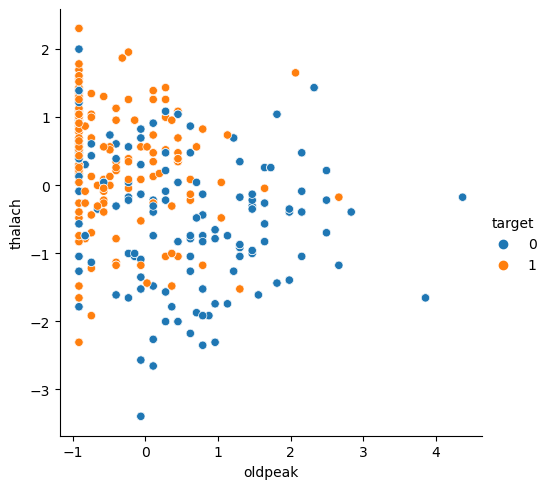

In [34]:
sns.relplot(data=X_scaled, x="oldpeak", y="thalach", hue=y)

This is a bit better but still not very distinct clustering. Given we have no known strong corrleations between the variables it makes sense now to create a pipeline whereby we standardise all the date, run a PCA to determine which variables when considered together into PCA components might be useful as predicters for heart disease. If there are PCAs of value we can then run a knn on these. 

# Principal Component Analysis

Let us consider all of the variables for each patient together. First create a pipeline. 

Resplit all data from variables into training and test data. 

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42) 

In [36]:
from sklearn.pipeline import make_pipeline

scaled_knn_all = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(algorithm='auto', leaf_size=45, n_neighbors=2, p=1)
)
scaled_knn_all

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=45, n_neighbors=2, p=1))])

Pipeline is a skilearn model so we can still fit, score and predict with the same methods. 

In [37]:
scaled_knn_all.fit(train_X, train_y)
scaled_knn_all.score(test_X, test_y)

0.9727626459143969

So having added in all the features we have improved our score from 0.86 to 0.97. The model is only getting 3% of the data wrong now. 

It is known though that the algorithm kNN is negatively impacted by having to consider too many features and so the solution is to reduce the dimensionality of the data using PCA. 

The PCA will allow a selection of the 2 most important principal components. These can then be used again in the kNN. 

Add PCA to the Pipeline, after the Standard Scaler but before kNN. 

In [38]:
from sklearn.decomposition import PCA

scaled_pca_knn = make_pipeline(
    StandardScaler(),
    PCA(n_components=2),  # PCA with 2 components
    KNeighborsClassifier(algorithm='auto', leaf_size=45, n_neighbors=2, p=1)
)
scaled_pca_knn

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=45, n_neighbors=2, p=1))])

Again fit and score the model. 

In [39]:
scaled_pca_knn.fit(train_X, train_y)
scaled_pca_knn.score(test_X, test_y)

0.9766536964980544

To plot the decision boundary. the following code is needed. 

In [40]:
transformer_steps = scaled_pca_knn[:-1]  # all except the last step
knn_step = scaled_pca_knn[-1]  # only the last step

Then pass the trabsformed data and the kNN step into the plottign function. 

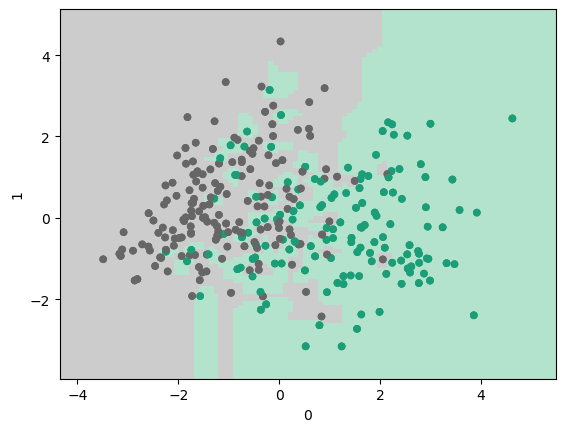

In [41]:
transformed_X = transformer_steps.transform(X)

plot_knn(knn_step, transformed_X, y)

This looks better but still not an accurate model for prediction of the disease. We chose to plot only 2 principal analysis components as this creates a clear decision boundary. It may be though that we need to add further PCA components. It is sensible to determine how much variance in the data is explained by each component to decide on the number that should be included when trying to create a k NN model for prediction. 

Firstly confirm how much variance in the data is explained by the 2 PCA components we have used. 

In [42]:
(scaled_pca_knn["pca"].explained_variance_ratio_)

array([0.21043239, 0.12119978])

In [43]:
sum(scaled_pca_knn["pca"].explained_variance_ratio_)

0.3316321700022157

This suggests that only 33% of the variance in data is explained by PC1 an PC2. 

It is worth using the `GridSearchCV` tool to try different values for the PCA components used in the model. 

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

scaled_pca_knn_cv = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        PCA(),
        KNeighborsClassifier(algorithm='auto', leaf_size=45, n_neighbors=2, p=1)
    ),
    {
        "pca__n_components" : range(1, 5),
    }
)
scaled_pca_knn_cv

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(leaf_size=45,
                                                             n_neighbors=2,
                                                             p=1))]),
             param_grid={'pca__n_components': range(1, 5)})

Fit and Score the model again

In [45]:
scaled_pca_knn_cv.fit(train_X, train_y)
scaled_pca_knn_cv.score(test_X, test_y)

0.9766536964980544

This score is very similar to before. 

In [46]:
scaled_pca_knn_cv.best_estimator_["pca"].n_components_

2

It is suggesting that the optimal number of PCA components to be included is 2. 

This is the number we used in the model so no further improvements can be made.

In [47]:
feature_names = list(Heartdata.columns.values)

In [48]:
feature_names

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

**What is the loading of varibales within PC1 and PC2?** 

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import scale

# load data
Heartdata = pd.read_csv('heart.csv')

y=Heartdata.pop("target")
X=Heartdata

feature_names = list(Heartdata.columns.values)

# apply PCA
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)


In [50]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=feature_names)
loadings



,PC1,PC2
age,0.040912,0.175058
sex,-0.001774,0.000925
cp,-0.001656,-0.013022
trestbps,0.049635,0.084990
chol,0.997824,-0.025209
fbs,0.000212,0.000412
restecg,-0.001533,-0.001258
thalach,-0.013974,-0.980162
exang,0.000651,0.007580
oldpeak,0.001625,0.018208


In [51]:
sort = loadings.sort_values(by=['PC1','PC2'], ascending=False)


In [52]:
sort

,PC1,PC2
chol,0.997824,-0.025209
trestbps,0.049635,0.084990
age,0.040912,0.175058
oldpeak,0.001625,0.018208
ca,0.001575,0.009830
thal,0.001225,0.002614
exang,0.000651,0.007580
fbs,0.000212,0.000412
slope,-0.000238,-0.010617
restecg,-0.001533,-0.001258


# Conclusions

Please see the Brief Summary Document. 